# Mobile Price Range Prediction Project(Classification)

### By:- Premshankar Saini

## Github Link -
https://github.com/premshankarsaini/Mobile-Price-Range-Prediction

In [1]:
from IPython.display import Image
Image(url='https://tse3.mm.bing.net/th?id=OIP.-0YJ1Eq8-21_E4SSsnFJxQHaEQ&pid=Api&P=0&h=180', width=850)

     

## Project Summary(In short) -

The Study analyzed factors influencing Mobile phone prices using a dataset with 21 variables. 
DATA WRANGLING addressed missing values by replacing zero values in pixel resolution height and screen width with mean values. EDA(EXPLORATORY DATA ANALYSIS) revealed equal distribution across price ranges, a positive correlation between battery capacity and price, and RAM as a strong indicator of higher price categories. Screen size and primary camera quality had minimal impact, while expensive phones tended to be lighter. Hypothesis testing confirmed RAM, battery power, and pixel quality as key price determinants. Machine Learning models, including Logistic Regression, Random Forest, and XGBoost, were tested, with Logistic Regression and XGBoost (with hyperparameter tuning) yielding the best results.

## Time to Start!

     

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Load the Dataset

In [3]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\data_mobile_price_range.csv")

### Data View

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Basic info

In [6]:
df.shape

(2000, 21)

Means 2000 Rows & 21 Columns are present in the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Check Missing & Duplicate values

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
len(df[df.duplicated()])

0

So, There is neither Duplicated values nor Missing values

### Let's know about the variables

In [10]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description

**Battery_power** - Total energy a battery can store in one time measured in mAh.

**Blue** - Has bluetooth or not.

**Clock_speed** - speed at which microprocessor executes instructions.

**Dual_sim** - Has dual sim support or not.

**Fc** - Front Camera mega pixels.

**Four_g** - Has 4G or not.

**Int_memory** - Internal Memory in Gigabytes.

**M_dep** - Mobile Depth in cm.

**Mobile_wt** - Weight of mobile phone.

**N_cores** - Number of cores of processor.

**Pc** - Primary Camera mega pixels.

**Px_height** - Pixel Resolution Height.

**Px_width** - Pixel Resolution Width.

**Ram**- Random Access Memory in Mega.

**Touch_screen** - Has touch screen or not.

**Wifi** - Has wifi or not.

**Sc_h** - Screen Height of mobile in cm.

**Sc_w** - Screen Width of mobile in cm.

**Talk_time** - longest time that a single battery charge will last when you are.

**Three_g** - Has 3G or not.

**Wifi** - Has wifi or not.

**Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),2(High Cost),3(Very High cost).

### Check Unique Values

In [12]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## Data Wrangling

The minimum value of px_height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0.
Therefore, we should check for and handle these cases appropriately to avoid any issues with our analysis.

In [13]:
# count number of phones with sc_w = 0
sc_w_zero_count=sum(df.sc_w==0)

# count number of phones with px_height = 0
px_height_zero_count=sum(df.px_height==0)
print(f"Number of phones with sc_w = 0: {sc_w_zero_count}")
print(f"Number of phones with px_height = 0: {px_height_zero_count}")

Number of phones with sc_w = 0: 180
Number of phones with px_height = 0: 2


replace 0 values with mean value

In [14]:
# replace 0 values with mean value
sc_w_mean= df['sc_w'].mean()
px_height_mean=df['px_height'].mean()

df.sc_w = np.where(df.sc_w==0,sc_w_mean,df.sc_w)
df.px_height = np.where(df.px_height==0,px_height_mean,df.px_height)

print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

Check again about Null & Duplicated Values

In [15]:
# Check again about Null & Duplicated Values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
len(df[df.duplicated()])

0

# Now,we try to Understand the relationships between variables(Data Vizualization & Experimenting with charts)

### 1.) Battery Power

<Figure size 1000x400 with 0 Axes>

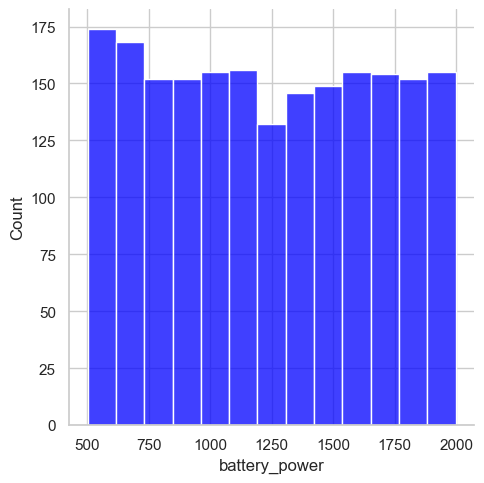

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,4)) 
sns.displot(df['battery_power'],color='blue')
plt.show()

**Why use this specific chart** - To know the count increasing with battery power or not.

**Insight** - As you can see the battery power between 500 mAh - 750 mAh are highly available in the market

### 2). Price

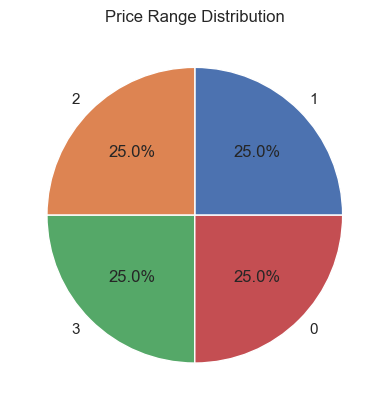

In [18]:
price_counts = df['price_range'].value_counts()
plt.pie(price_counts, labels= price_counts.index,autopct = '%1.1f%%')
plt.title('Price Range Distribution')
plt.show()

**Why use this Chart-** I picked this chart to know the distribution of percentage of phones with price range low or high.

**Insight**- All category phones are distributed with equal price range.

### 3). Bluetooth

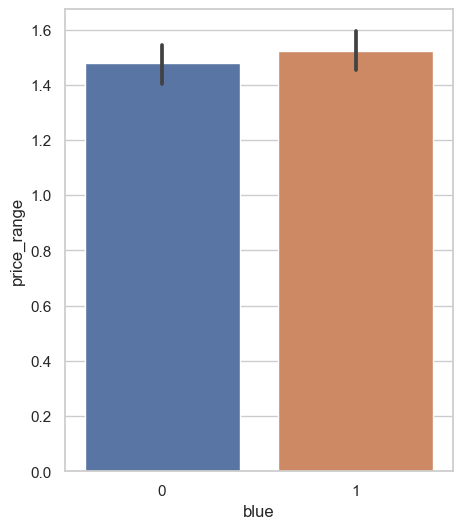

In [19]:
plt.figure(figsize = (5,6))
sns.barplot(x='blue',y='price_range',data=df)
plt.show()

**Why use this Chart-** To know the devices having bluetooth or not with price range

**Insight:-** Almost half the devices have Bluetooth, and half don’t.

**Positive business impact from this insight-** The observation that almost half of the devices in the dataset have Bluetooth and half do not could have a positive business impact if a company can leverage this information to improve its products or marketing strategies.

### 4). RAM

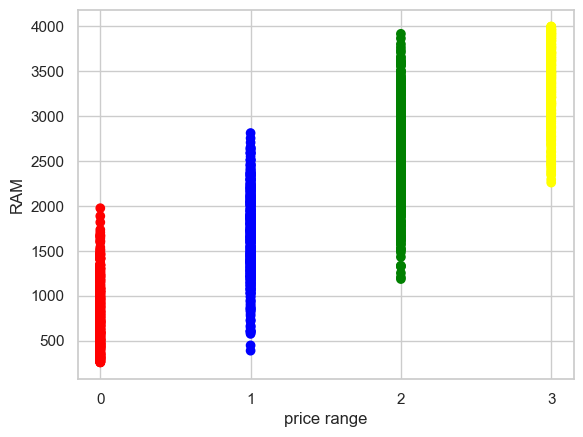

In [20]:
# Create a color map for the points based on price range
colors = {0:'red',1:'blue',2:'green',3:'yellow'}

# Create the scatter plot
plt.scatter(df['price_range'],df['ram'],c=df['price_range'].apply(lambda x:colors[x]))
plt.xlabel('price range')
plt.ylabel('RAM')
plt.xticks([0,1,2,3])
plt.show()

**Why you pick this specific chart** - To know the price relation with ram.

**Insight** -The scatter plot shows a clear positive correlation between RAM and price range, with the majority of the data points clustering towards the upper right corner. This suggests that as the price range increases, the amount of RAM in the device generally increases as well.

### 5). Dual_sim

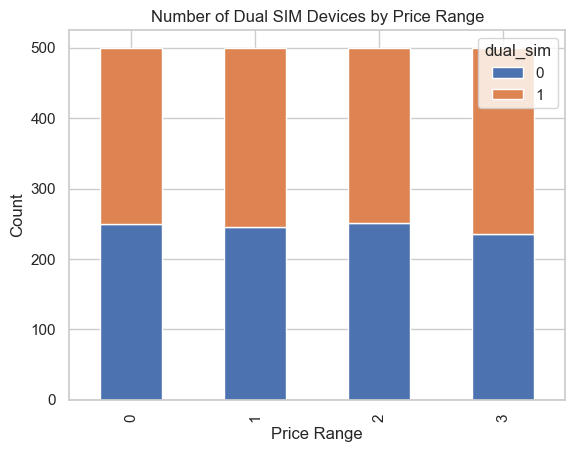

In [21]:
# Group the data by price range and dual sim, and count the number of devices in each group
sim_count = df.groupby(['price_range','dual_sim'])['dual_sim'].count()

# Reshape the data into a dataframe with price range as rows, dual sim as columns, and the count as values
sim_count = sim_count.unstack()

# Plot a stacked bar chart of the dual sim count for each price range
sim_count.plot(kind='bar',stacked=True)

# Add axis labels and a title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Number of Dual SIM Devices by Price Range')

# Show the plot
plt.show()

**Why did you use this specific chart-** To know the price range according to dual sim using or not.

**Insight** -We can observe that upto low,medium,high almost it is same but for very high price range it is seen that it is found that the count is raised who using dual devices and count is increasing for dual devices.

### 6).FC(Front camera megapixels)

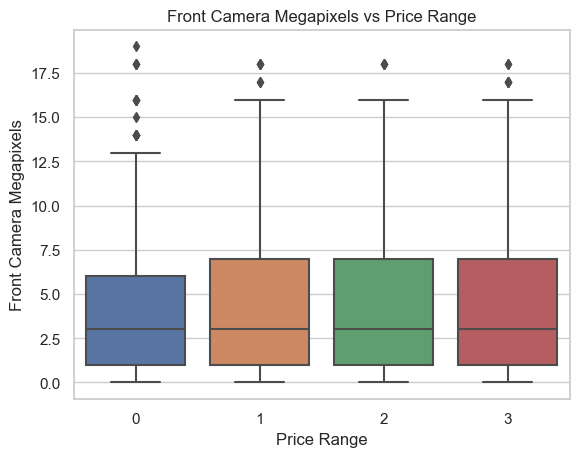

In [22]:
# create a boxplot of front camera megapixels grouped by price range
sns.boxplot(x='price_range', y='fc', data=df)

# set x and y axis labels and title
plt.xlabel('Price Range')
plt.ylabel('Front Camera Megapixels')
plt.title('Front Camera Megapixels vs Price Range')
plt.show()

**Insights:-** It is almost same impcact of price range in all categories.

### 7).PC(Primary camera Megapixels)

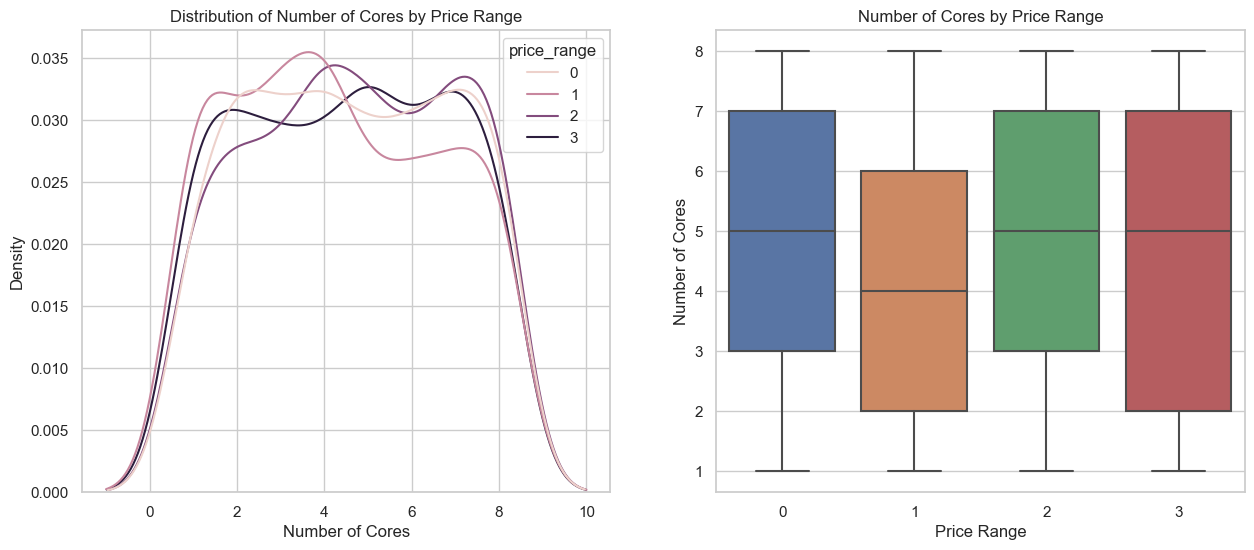

In [23]:
# Create a figure with two subplots side-by-side
fig,axs = plt.subplots(1,2,figsize=(15,6))

# Create a kernel density estimation plot of the distribution of number of cores across price ranges
sns.kdeplot(x='n_cores',hue = 'price_range' ,data=df,ax=axs[0])

# Create a box plot of the distribution of number of cores for each price range
sns.boxplot(x='price_range',y='n_cores',data=df,ax=axs[1])

# Set the title of the first subplot and the labels of both subplots
axs[0].set_title('Distribution of Number of Cores by Price Range')
axs[0].set_xlabel('Number of Cores')
axs[0].set_ylabel('Density')
axs[1].set_title('Number of Cores by Price Range')
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Number of Cores')

# Show the plot
plt.show()

**Why use this chart**-To know the distribution of number of cores by price range and number of cores by price range.

**Insights**- The distribution of primary camera megapixels across different target categories is relatively consistent, indicating that this feature may not significantly influence the price range of mobile phones. This consistency is a positive sign for prediction modeling, as it suggests that this feature may not be a major confounding factor in predicting the price range.

**Insights help creating a positive business impact**- insights can help create a positive business impact by providing an understanding of the relationship between different features and the price range of mobile phones. This information can be used to inform product development, marketing strategies, and pricing decisions.

### 8). Mobile Weight

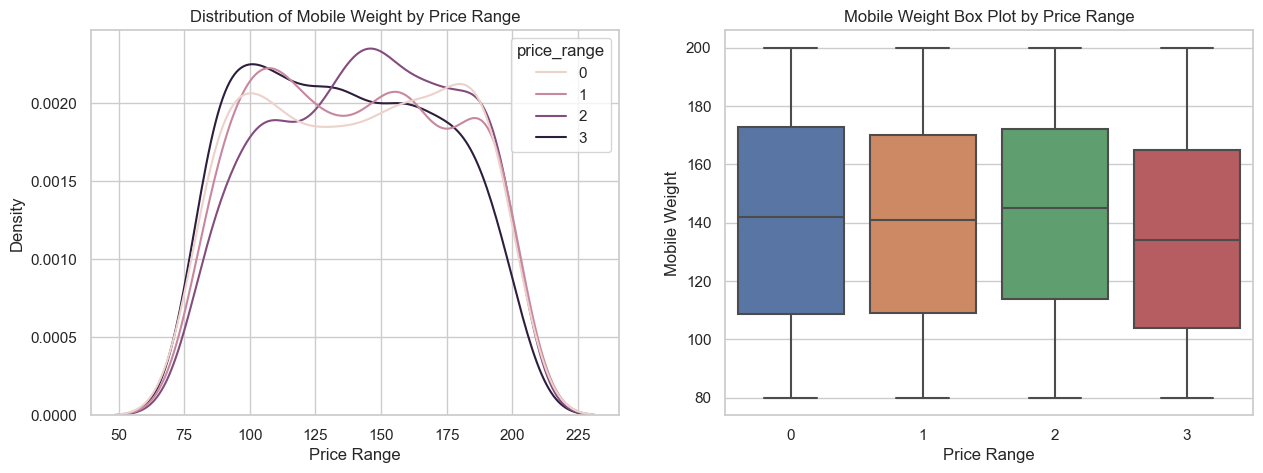

In [24]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
axs[0].set_xlabel('Price Range')
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Mobile Weight')
axs[0].set_title('Distribution of Mobile Weight by Price Range')
axs[1].set_title('Mobile Weight Box Plot by Price Range')
plt.show()

**Why use this Chart-** To know the distribution of mobile weight by price range and mobile weight with respect to price range.

**Insight-** It can be observed that mobile phones with higher price ranges tend to be lighter in weight compared to lower price range phones.

**Insights help creating a positive business impact ?** insights from the analysis can definitely help create a positive business impact. By understanding which features are more important in determining the price range of mobile phones, businesses can better position their products and pricing strategies in the market. For example, if a certain feature such as battery capacity or camera quality is highly valued by customers in a specific price range, businesses can focus on improving that feature to differentiate themselves from competitors and increase sales.

### 9). Pixel Width

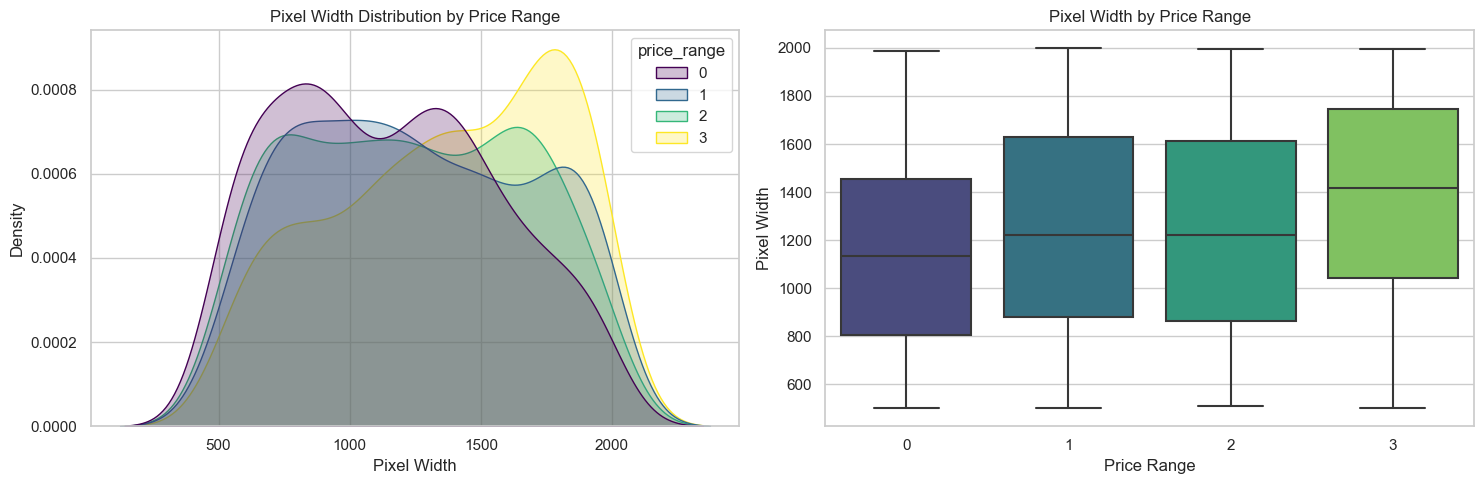

In [25]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a kernel density estimate plot for the pixel width distribution for each price range
sns.kdeplot(data=df, x='px_width', hue='price_range', fill=True, common_norm=False, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Pixel Width')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Width Distribution by Price Range')

# Create a box plot of pixel width for each price range
sns.boxplot(data=df, x='price_range', y='px_width', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Width')
axs[1].set_title('Pixel Width by Price Range')

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

### 10). Pixel Height

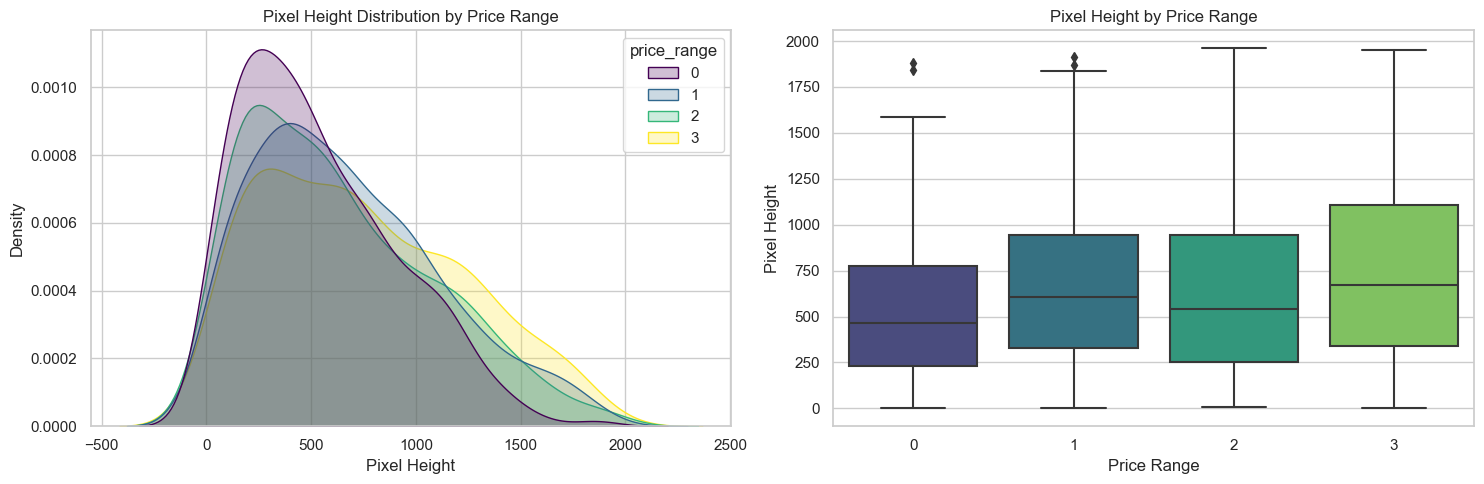

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a kernel density estimate plot for the pixel height distribution for each price range
sns.kdeplot(data=df, x='px_height', hue='price_range', fill=True, common_norm=False, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Pixel Height')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Height Distribution by Price Range')

# Create a box plot of pixel height for each price range
sns.boxplot(data=df, x='price_range', y='px_height', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Height')
axs[1].set_title('Pixel Height by Price Range')

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

**Why use this Chart-** To know the pixel width & pixel height on the price range.

**Insight-** Based on the analysis of the pixel width distribution across different price ranges, it can be observed that there is not a continuous increase in pixel width as we move from low cost to very high cost mobile phones. In particular, mobile phones with medium cost and high cost have almost equal pixel width, indicating that this may not be the sole driving factor in deciding the price range of mobile phones. Other features such as processor, camera quality, storage capacity, and brand value may also play a significant role in determining the price range.

**Insights help creating a positive business impact?** - the analysis of pixel height distribution across different price ranges can help create a positive business impact by providing useful information to mobile phone manufacturers and marketers. By understanding the relationship between pixel height and price range, manufacturers can optimize their product design and pricing strategy to meet the demands of the market and improve sales. Marketers can also leverage this information to develop targeted advertising campaigns and promotions that appeal to the preferences of different consumer segments.

### 11). Correlation Heatmap

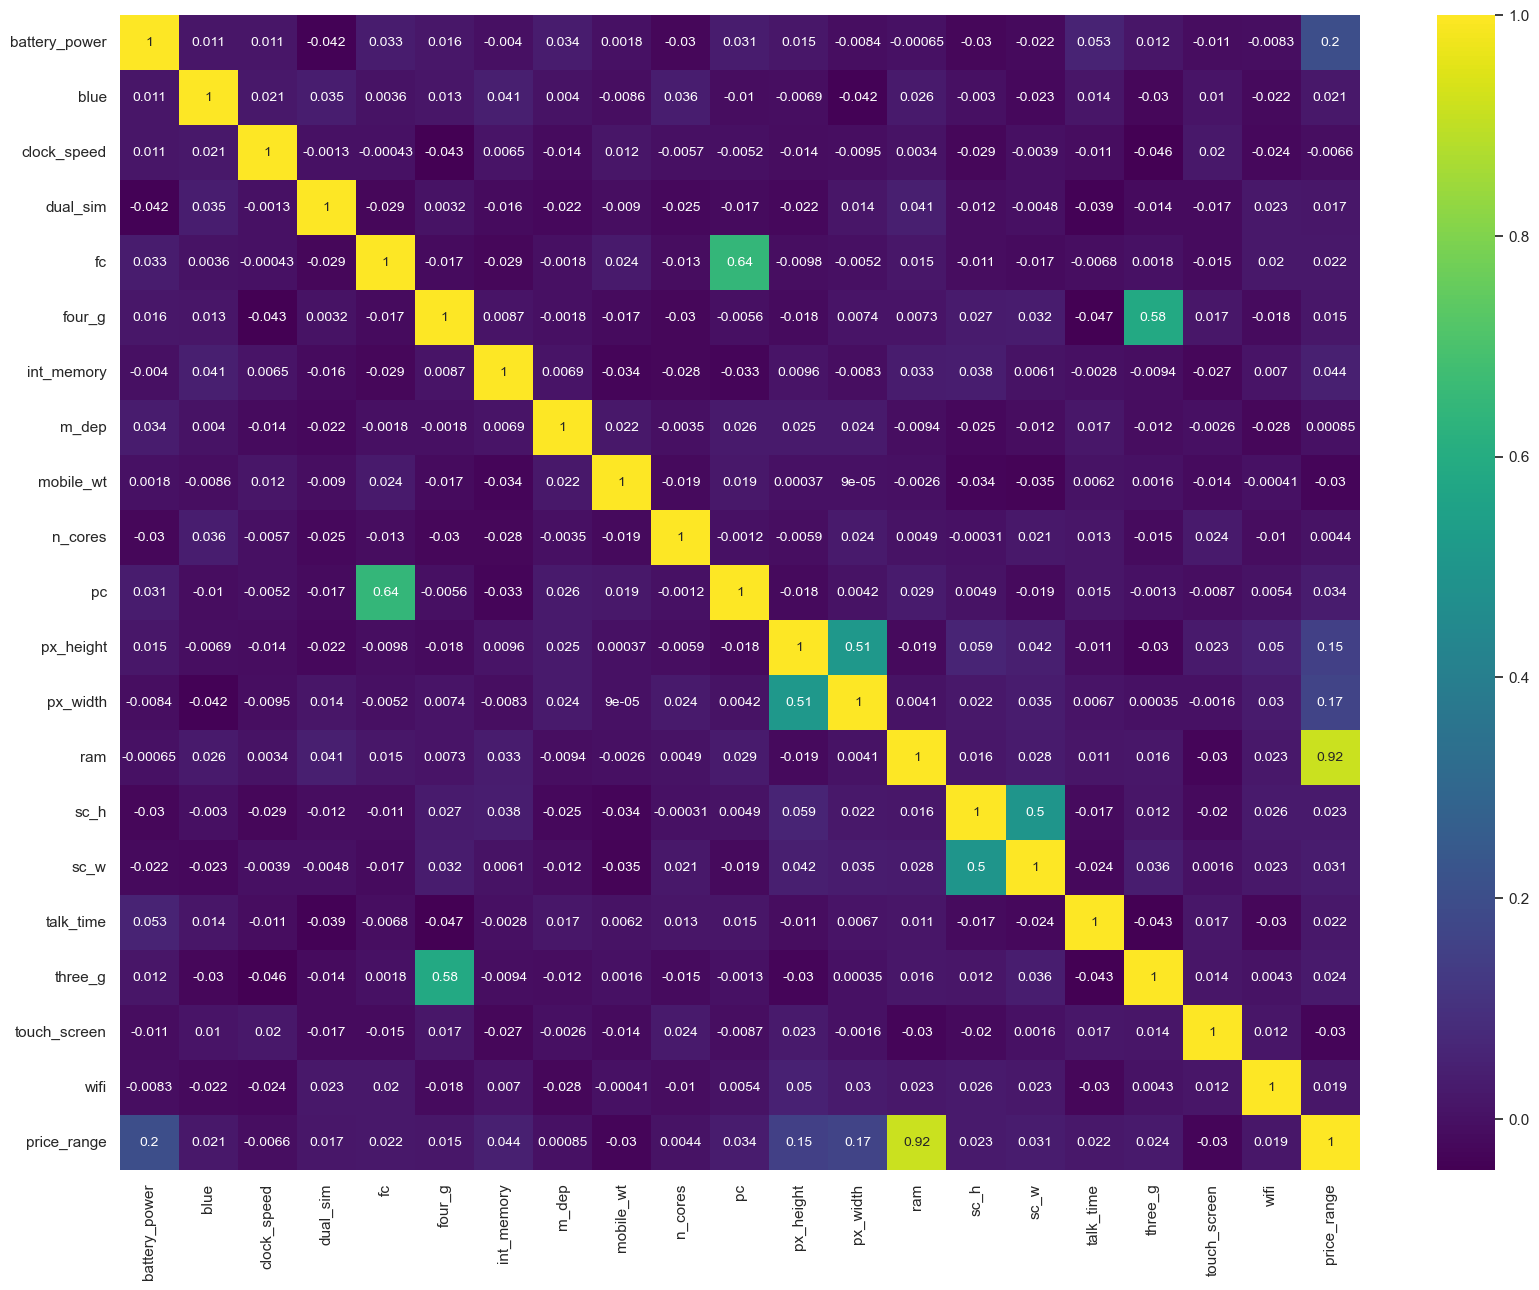

In [27]:
correlation = df.corr()
plt.figure(figsize=[20, 15])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})
plt.show()

**Why use this Chart** - To check the multi-collinearity.

**Insights:-** The high correlation between RAM and price_range is a positive sign for businesses as it indicates that RAM will be a major deciding factor in estimating the price range of a mobile phone.

# Feature Engineering & Data Pre-processing

### Handling Missing Values

In [28]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There is no Missing value available

### Handling Outliers

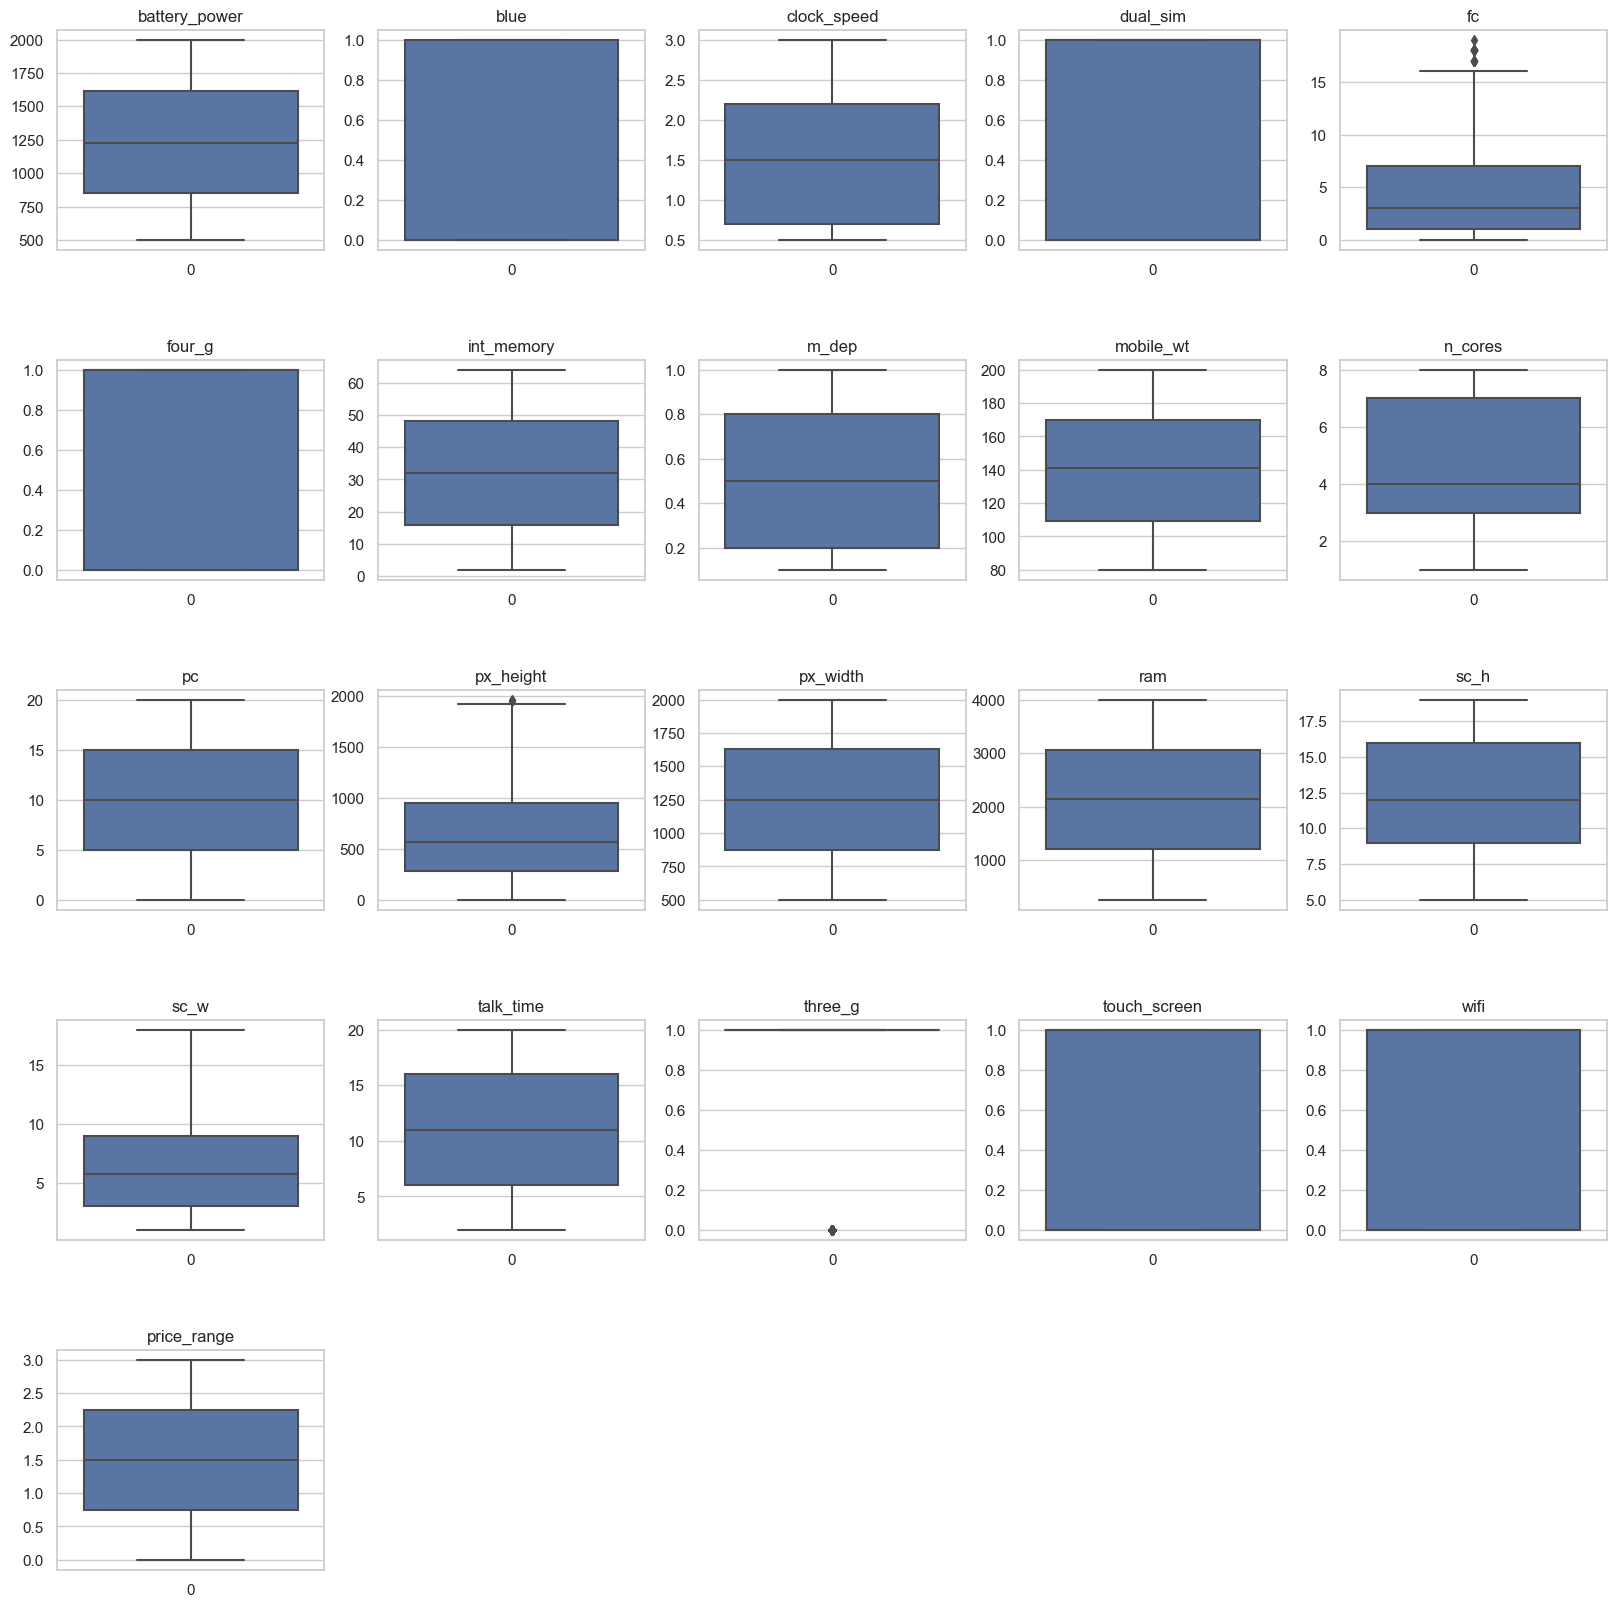

In [29]:
plt.figure(figsize=(20,20))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
  plt.title(item)
  plt.subplots_adjust(hspace=0.5)
print("\n")

Their is no much outliers are present no need to do much experiment.

### Data Transformation

In [30]:
df.drop(['px_height', 'px_width'], axis = 1, inplace = True)

X = df.drop(['price_range'], axis = 1)
y = df['price_range']

I have dropped px_height and px_width which dont have any use.

### Data Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

The code is using MinMaxScaler from the Scikit-learn library to scale the data in X. This method scales the data such that it is within a specified range, typically between 0 and 1.

### Data Splitting

In [32]:
X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [33]:
X.shape

(2000, 18)

In [34]:
y.shape

(2000,)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [36]:
X_train.shape

(1600, 18)

# ML Model Implementation

### LOGISTIC REGRESSION

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       107
           1       0.69      0.76      0.72        83
           2       0.68      0.65      0.67        97
           3       0.85      0.84      0.84       113

    accuracy                           0.79       400
   macro avg       0.78      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400

[[96  9  0  0]
 [11 63 17  0]
 [ 0 11 63 18]
 [ 0  0 17 95]]


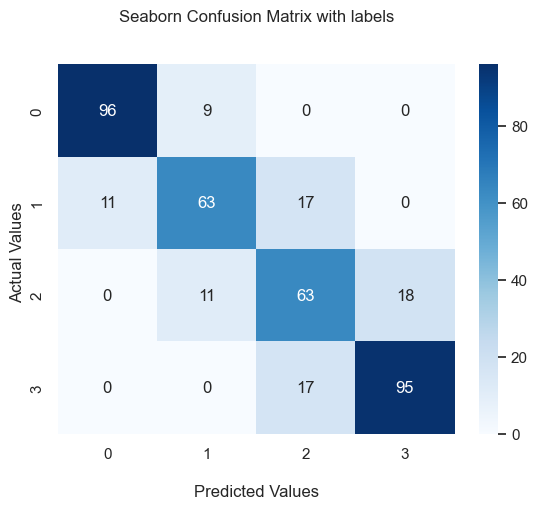

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train , y_train)

# Prediction
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_pred_test,y_test))

# Predict on the model
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

plt.show()

In [38]:
# Evaluation metrics for Training Set

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       421
           1       0.75      0.80      0.77       387
           2       0.73      0.79      0.76       378
           3       0.92      0.86      0.89       414

    accuracy                           0.83      1600
   macro avg       0.84      0.83      0.83      1600
weighted avg       0.84      0.83      0.84      1600



**Conclusion:-** The ML model used is a Logistic Regression model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training set.

The precision is the ratio of true positive predictions to the total number of positive predictions. The recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. The F1-score is the harmonic mean of precision and recall.

Looking at the evaluation metric scores, we can see that the model has an overall accuracy of 83%, meaning that it correctly classified 83% of the instances in the training set. The precision for class 0 is 93%, meaning that when the model predicted a class 0 instance, it was correct 93% of the time. The recall for class 0 is 88%, meaning that the model correctly identified 88% of the actual class 0 instances in the dataset. The F1-score for class 0 is 90%.

Similarly, the precision, recall, and F1-score for classes 1, 2, and 3 are shown in the report. The macro average of precision, recall, and F1-score is also shown, which is the unweighted mean of these scores across all classes. In this case, the macro average for precision, recall, and F1-score is 83%.

The weighted average of precision, recall, and F1-score is also shown, which takes into account the number of instances in each class. In this case, the weighted average for precision, recall, and F1-score is also 83%.

Overall, the model seems to be performing reasonably well, with an accuracy of 83% on the training set. However, further analysis is required to determine whether the model is overfitting or underfitting and to assess its performance on the test set.

### Cross- Validation & Hyperparameter Tuning

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_scaled, y, cv=5)

print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross-validation scores: [0.8075 0.825  0.8375 0.8125 0.8125]
Average cross-validation score: 0.819


In [40]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_scaled, y)

print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test, y_test))

Best cross-validation score: 0.821
Best parameters: {'C': 10}
Test set score: 0.82


**Which hyperparameter optimization technique have you used and why?**

GridSearchCV is a commonly used technique for hyperparameter tuning that involves searching over a predefined grid of hyperparameters and selecting the combination that gives the best performance on a validation set.

In this case, the grid of hyperparameters included different values of C, which controls the regularization strength of the logistic regression model. The reason for using GridSearchCV is that it exhaustively searches over the entire grid of hyperparameters, which helps to find the optimal combination of hyperparameters that gives the best performance on the validation set.

### XGBOOST

In [41]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

# Prediction
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluation metrics for Test set
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set)= ')
print(score)

Classification Report for XGBoost(Test set)= 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       105
           1       0.75      0.77      0.76        91
           2       0.65      0.70      0.67        92
           3       0.87      0.78      0.82       112

    accuracy                           0.80       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.80      0.80      0.80       400



In [42]:
# Evaluation metrics for Training Set

score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= ')
print(score)

Classification Report for XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.99      0.98      0.98       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



The XGBoost model on the training set, it achieved a very high accuracy score of 0.99. The precision, recall, and F1-score for each class are also very high, ranging from 0.99 to 1.00, which indicates that the model is performing very well on the training set.

### Cross- Validation & Hyperparameter Tuning

In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the XGBoost classifier
xgb = XGBClassifier(verbosity=0, random_state=42)

# Define the hyperparameter search space
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

# Perform cross-validation and hyperparameter tuning
grid_search = GridSearchCV(xgb, params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and CV score
print("Best hyperparameters:", grid_search.best_params_)
print("Cross-validation score:", grid_search.best_score_)

# Get the best model from grid search
best_xgb = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred_test = best_xgb.predict(X_test)
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Test set):')
print(score)

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
Cross-validation score: 0.81125
Classification Report for XGBoost(Test set):
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       105
           1       0.77      0.73      0.75        91
           2       0.66      0.73      0.69        92
           3       0.88      0.79      0.84       112

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.79       400
weighted avg       0.80      0.80      0.80       400



[[98  7  0  0]
 [13 66 12  0]
 [ 0 13 67 12]
 [ 0  0 23 89]]


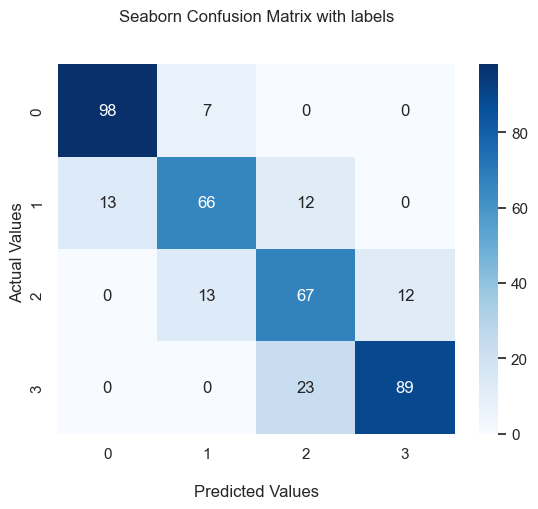

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [45]:
# Evaluation metrics for train

score = classification_report(y_train, y_pred_train)
print('Classification Report for tuned XGBoost(Train set)= ')
print(score)

Classification Report for tuned XGBoost(Train set)= 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.99      0.98      0.98       409
           2       0.99      0.99      0.99       408
           3       1.00      1.00      1.00       388

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator, and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tuning, and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance..

### Random Forest classifier

In [46]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
print("accuracy score of test data:",test_score)

y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
print("accuracy score of train data:",train_score)

# classification report for Test Set
print(classification_report(y_test, y_pred))

accuracy score of test data: 0.8075
accuracy score of train data: 1.0
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       105
           1       0.80      0.76      0.78        91
           2       0.64      0.74      0.69        92
           3       0.87      0.78      0.82       112

    accuracy                           0.81       400
   macro avg       0.81      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400



[[99  6  0  0]
 [ 9 69 13  0]
 [ 0 11 68 13]
 [ 0  0 25 87]]


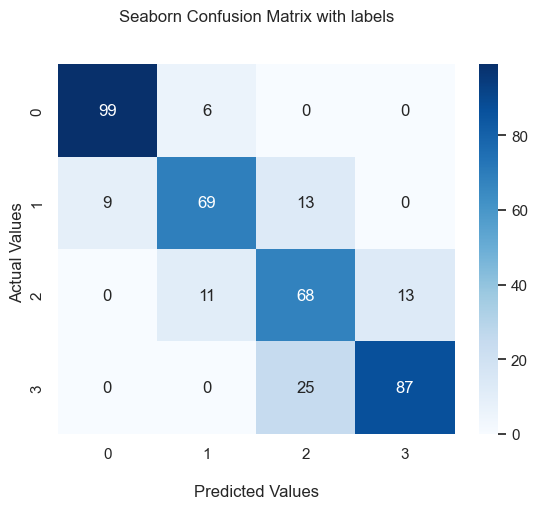

In [47]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

## Conclusion

Based on the exploratory data analysis (EDA), we observed that the mobile phones in the dataset are divided into four different price ranges, each having a similar number of elements. Additionally, we found that approximately half of the devices have Bluetooth, while the other half do not. Furthermore, we noted that as the price range increases, there is a gradual increase in battery power, and RAM shows continuous growth from low-cost to very high-cost phones. Moreover, the costly phones tend to be lighter than the lower-priced ones.

Our analysis indicates that RAM, battery power, and pixel quality are the most significant factors affecting the price range of mobile phones. From our experiments, we concluded that logistic regression and XGBoost algorithms with hyperparameter tuning yielded the best results in predicting the price range of mobile phones.

In summary, the EDA revealed that the dataset consists of mobile phones grouped into four price ranges, with similar numbers of devices in each range, and a 50-50 distribution of Bluetooth. We also observed that RAM and battery power increase with the price range, and higher-priced phones tend to be lighter. Our experiments suggest that the most important factors affecting the price range of mobile phones are RAM, battery power, and pixel quality. Finally, we found that logistic regression and XGBoost algorithms, coupled with hyperparameter tuning, provide the best performance in predicting the price range of mobile phones.

# Successfully completed the Machine Learning Capstone Project !